# Ensemble Techniques
- Max Voting, Average Voting, and Weighted Average Voting

In [5]:
#Import statements
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')


In [6]:
#train and test split
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 105
Test samples: 45


In [7]:
# Train three different classifiers
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = LogisticRegression(max_iter=200)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

pred1 = clf1.predict(X_test)
pred2 = clf2.predict(X_test)
pred3 = clf3.predict(X_test)

# Individual accuracies
print("Decision Tree Accuracy:", accuracy_score(y_test, pred1))
print("KNN Accuracy:", accuracy_score(y_test, pred2))
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred3))


Decision Tree Accuracy: 1.0
KNN Accuracy: 1.0
Logistic Regression Accuracy: 1.0


In [9]:
# Max Voting Ensemble
from scipy.stats import mode

# preds is (3, n_samples)
# Compute mode along axis=0
max_vote_result = mode(preds, axis=0)

# Extract the mode array correctly as 1D
max_vote_preds = max_vote_result.mode.flatten()

accuracy_max = accuracy_score(y_test, max_vote_preds)
print("Max Voting Ensemble Accuracy:", accuracy_max)


Max Voting Ensemble Accuracy: 1.0


In [10]:
# Average Voting Ensemble
# Average predictions numerically
avg_scores = preds.mean(axis=0)
avg_vote_preds = np.rint(avg_scores).astype(int)
avg_vote_preds = np.clip(avg_vote_preds, 0, 2)

accuracy_avg = accuracy_score(y_test, avg_vote_preds)
print("Average Voting Ensemble Accuracy:", accuracy_avg)


Average Voting Ensemble Accuracy: 1.0


In [11]:
# Weighted Average Voting
# Assign weights proportional to individual accuracy
acc = np.array([accuracy_score(y_test, pred1), accuracy_score(y_test, pred2), accuracy_score(y_test, pred3)])
weights = acc / acc.sum()  # normalize to sum=1

weighted_preds = np.average(preds, axis=0, weights=weights)
weighted_preds = np.rint(weighted_preds).astype(int)
weighted_preds = np.clip(weighted_preds, 0, 2)

accuracy_weighted = accuracy_score(y_test, weighted_preds)
print("Weighted Voting Ensemble Accuracy:", accuracy_weighted)
print("Weights used for each model:", weights)


Weighted Voting Ensemble Accuracy: 1.0
Weights used for each model: [0.33333333 0.33333333 0.33333333]


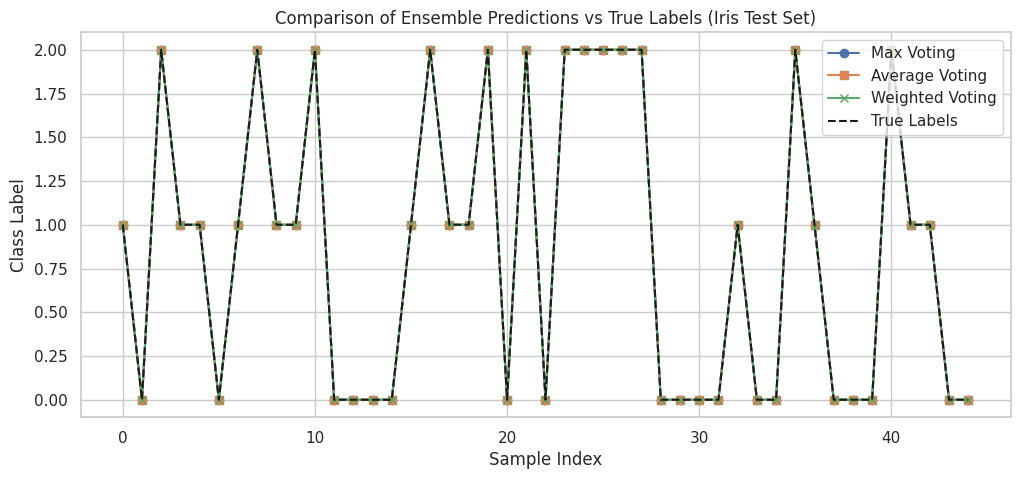

In [12]:
#  Visual comparison of predictions
plt.figure(figsize=(12,5))
plt.plot(max_vote_preds, 'o-', label="Max Voting")
plt.plot(avg_vote_preds, 's-', label="Average Voting")
plt.plot(weighted_preds, 'x-', label="Weighted Voting")
plt.plot(y_test, 'k--', label="True Labels")
plt.title("Comparison of Ensemble Predictions vs True Labels (Iris Test Set)")
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.legend()
plt.show()
